In [14]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import time

In [16]:
from runner import Runner

In [17]:
R = Runner(verbose=False)

*** GP2 ***
Working directory: /tmp/tmp8gpyyr0xGP2


In [18]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE/labels.npy')

In [19]:
masks.shape

(1000, 512, 512, 1)

In [20]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}
PERCENT_TO_REPLACE = 30

In [21]:
#
#
R.setup_data(images, masks, dataset_size=1000, weights=weights)

Weights OK!


In [22]:
RUNS = 10

In [23]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    l = R.find_machine_labels()
    if l == 0:
        print('No more machine labels.')
        print('TOOK', time.time()-t0, 'seconds')
        break
    R.relabel(percent_to_replace=PERCENT_TO_REPLACE)
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Model saved to /tmp/tmp8gpyyr0xGP2/unet_0.model
History saved to /tmp/tmp8gpyyr0xGP2/history_0.pickle
Testing the classifier...
10/10 [==============================] - 1s 86ms/step - loss: 1.4207 - dice_coeff: 0.2146
Model saved to /tmp/tmp8gpyyr0xGP2/cnnd_0.model
History saved to /tmp/tmp8gpyyr0xGP2/cnnd_history_0.pickle
Testing the discriminator...
2/2 [==============================] - 0s 22ms/step - loss: 0.0449 - accuracy: 0.9833
Found 26 machine labels.
Machine labels [ 0  1  2  5  6  9 10 11 19 21 24 30 31 36 37 41 42 43 44 45 46 48 52 53
 54 59]
D_ids ['cc2ca11a-8b2a-4c0b-9c68-4f87c97dec83', '4504e742-c98d-4e5b-b498-af0cd4a35a87', '9ac04e0d-0d46-4ffb-9981-b0aa8741194b', 'd3226ac1-28d8-4565-b903-79925624fc53', '397857de-0bc8-4cd3-86d5-1a2c7ca25448', '28af7c21-9a93-44a5-95ff-e61079648ec7', 'f44f0362-76a2-4d9f-ab5e-561413194ce6', 'c38f10ef-8b81-46f3-8d5d-117703cfd2a3', 'f895351d-0a05-43c1-b2f4-a9fbb3636b01', 'da362876-4dc6-4e7f-a8c7-744448004f63', '500178f1-2b99-4790-a

Model saved to /tmp/tmp8gpyyr0xGP2/unet_4.model
History saved to /tmp/tmp8gpyyr0xGP2/history_4.pickle
Testing the classifier...
10/10 [==============================] - 1s 92ms/step - loss: 1.1510 - dice_coeff: 0.3153
Testing the discriminator...
2/2 [==============================] - 0s 19ms/step - loss: 0.8080 - accuracy: 0.8167
Found 21 machine labels.
Machine labels [ 2  8 11 13 15 16 18 20 21 24 25 28 31 33 34 36 40 41 48 55 58]
D_ids ['4356f009-5932-4d00-9d22-7fdf629221c4', 'cd7d83db-dc0e-478d-8e03-873d6ef85bcf', '0b08c3aa-676e-4cc6-819c-7bd7bb50be25', 'e9cc89fe-a504-4f89-904f-b84ec51da759', 'c9d0719c-fcae-4029-a398-34e44af7af28', 'ec66b760-5f13-4481-acc2-86d56dcaab6c', 'adc2aa0a-c197-44fd-84ab-c425af80ee1f', '4f8b25fe-1618-4ed8-9795-d012ebbb1228', 'e8e70292-afe9-4260-bc8d-aeb90825e57f', '1f5b94df-7a8c-4ec0-912f-0823d457e9a4', 'be44e7c2-20f5-493b-a3cf-5a3661b7e614', '41793a4c-4687-4c27-a55c-0ac1acf99148', '2d35d6db-7f03-45ae-82b1-c8b1fab416a7', '59639644-e53d-4d60-8890-7f8c73cb56

In [24]:
R.classifier_scores

[[1.4207088947296143, 0.2145918607711792],
 [1.3448594808578491, 0.24182865023612976],
 [1.3371570110321045, 0.25557321310043335],
 [1.253345012664795, 0.28664833307266235],
 [1.1509567499160767, 0.3153291642665863],
 [1.090656042098999, 0.3335990905761719],
 [1.0389187335968018, 0.35323596000671387],
 [0.9923996925354004, 0.3737395405769348],
 [0.9879721999168396, 0.3725345730781555]]

In [25]:
R.discriminator_scores

[[0.0449461005628109, 0.9833333492279053],
 [0.11270052939653397, 0.949999988079071],
 [0.10134274512529373, 0.9333333373069763],
 [0.2321927398443222, 0.9333333373069763],
 [0.8080320954322815, 0.8166666626930237],
 [2.4939768314361572, 0.6666666865348816],
 [4.858522415161133, 0.5333333611488342],
 [4.619325637817383, 0.550000011920929],
 [6.560461521148682, 0.4833333194255829]]

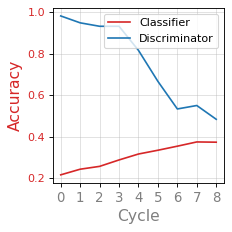

In [26]:
R.plot() # plot after fixing bug

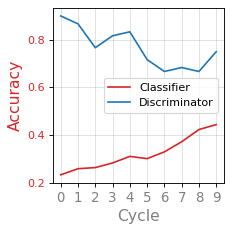

In [13]:
R.plot() # plot before bug fixed